In [139]:
import datetime 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df_input = pd.read_csv("Alpha.CmdLine/test_input.csv")
df_input.Date = pd.to_datetime(df_input.Date)
df_alpha = pd.read_csv("Alpha.CmdLine/test_output.csv")
df_alpha.Date = pd.to_datetime(df_alpha.Date)

In [62]:
df_input.head()

Date        Open        High         Low       Close   Adj Close  \
0 2020-06-08  295.000000  298.799988  292.000000  292.799988  287.182831   
1 2020-06-09  293.000000  296.000000  290.399994  290.799988  285.221191   
2 2020-06-10  294.000000  297.000000  293.000000  296.399994  290.713745   
3 2020-06-11  297.600006  299.600006  294.399994  294.399994  288.752106   
4 2020-06-12  289.000000  296.200012  288.399994  296.200012  290.517609   

    Volume  
0  8429072  
1  8360605  
2  6524580  
3  9078417  
4  6301599

In [63]:
df_alpha.head()

Date    Alpha1    Alpha2    Alpha3
0 2020-06-15 -5.399994  0.800018 -1.784641
1 2020-06-16  5.000000  2.400024  0.256169
2 2020-06-17 -2.799988  2.600006  2.100453
3 2020-06-18  1.600006  0.399994 -0.714341
4 2020-06-19  4.199982 -0.200012  3.649515

In [108]:
df_input_ret = df_input[["Date", "Close"]].copy()
display(df_input_ret.head(10))
df_input_ret["PrevClose"] = df_input_ret.Close.shift(1)
df_input_ret["Ret"] = df_input_ret.Close / df_input_ret.PrevClose - 1.0
df_input_ret["NextRet"] = df_input_ret["Ret"].shift(-1)

# filter on date to match the date of df_alpha
df_input_ret = df_input_ret[df_input_ret.Date >= df_alpha.iloc[0].Date]
display(df_input_ret)

Date       Close
0 2020-06-08  292.799988
1 2020-06-09  290.799988
2 2020-06-10  296.399994
3 2020-06-11  294.399994
4 2020-06-12  296.200012
5 2020-06-15  287.399994
6 2020-06-16  295.799988
7 2020-06-17  293.600006
8 2020-06-18  296.000000
9 2020-06-19  300.399994

Date       Close   PrevClose       Ret   NextRet
5   2020-06-15  287.399994  296.200012 -0.029710  0.029228
6   2020-06-16  295.799988  287.399994  0.029228 -0.007437
7   2020-06-17  293.600006  295.799988 -0.007437  0.008174
8   2020-06-18  296.000000  293.600006  0.008174  0.014865
9   2020-06-19  300.399994  296.000000  0.014865  0.037284
..         ...         ...         ...       ...       ...
242 2021-06-01  487.799988  485.799988  0.004117 -0.006970
243 2021-06-02  484.399994  487.799988 -0.006970 -0.017754
244 2021-06-03  475.799988  484.399994 -0.017754  0.005464
245 2021-06-04  478.399994  475.799988  0.005464 -0.014632
246 2021-06-07  471.399994  478.399994 -0.014632       NaN

[242 rows x 5 columns]

In [109]:
df = pd.merge(df_alpha, df_input_ret, how="left", on="Date")
df = df[(~pd.isnull(df.Ret)) & (~pd.isnull(df.NextRet))]
df

Date     Alpha1     Alpha2     Alpha3       Close   PrevClose  \
0   2020-06-15  -5.399994   0.800018  -1.784641  287.399994  296.200012   
1   2020-06-16   5.000000   2.400024   0.256169  295.799988  287.399994   
2   2020-06-17  -2.799988   2.600006   2.100453  293.600006  295.799988   
3   2020-06-18   1.600006   0.399994  -0.714341  296.000000  293.600006   
4   2020-06-19   4.199982  -0.200012   3.649515  300.399994  296.000000   
..         ...        ...        ...        ...         ...         ...   
236 2021-05-31  35.399994  32.200012   2.760884  485.799988  477.399994   
237 2021-06-01  13.199982  12.399994   4.133598  487.799988  485.799988   
238 2021-06-02   1.600006   7.200012   4.472644  484.399994  487.799988   
239 2021-06-03  -7.200012   4.799988  -2.710105  475.799988  484.399994   
240 2021-06-04   1.000000  -5.199982 -11.094970  478.399994  475.799988   

          Ret   NextRet  
0   -0.029710  0.029228  
1    0.029228 -0.007437  
2   -0.007437  0.008174  
3    0.008174  0.014865  
4    0.014865  0.037284  
..        ...       ...  
236  0.017595  0.004117  
237  0.004117 -0.006970  
238 -0.006970 -0.017754  
239 -0.017754  0.005464  
240  0.005464 -0.014632  

[241 rows x 8 columns]

In [110]:
%time d = np.polyfit(df.Alpha1, df.Ret, 1)
d

CPU times: user 1.02 ms, sys: 0 ns, total: 1.02 ms
Wall time: 992 µs


array([0.0004405 , 0.00051456])

In [111]:
df.corr()

Alpha1    Alpha2    Alpha3     Close  PrevClose       Ret  \
Alpha1     1.000000  0.913998  0.798881  0.091975   0.022419  0.420782   
Alpha2     0.913998  1.000000  0.730449  0.088256   0.074185  0.075498   
Alpha3     0.798881  0.730449  1.000000  0.109565   0.035529  0.442840   
Close      0.091975  0.088256  0.109565  1.000000   0.987487  0.026265   
PrevClose  0.022419  0.074185  0.035529  0.987487   1.000000 -0.129332   
Ret        0.420782  0.075498  0.442840  0.026265  -0.129332  1.000000   
NextRet   -0.053261 -0.043012  0.031325 -0.145675  -0.132740 -0.094950   

            NextRet  
Alpha1    -0.053261  
Alpha2    -0.043012  
Alpha3     0.031325  
Close     -0.145675  
PrevClose -0.132740  
Ret       -0.094950  
NextRet    1.000000

In [135]:
# Run a linear regression between the alphas and the returns
X = df[["Alpha1", "Alpha2", "Alpha3"]]
Y = df["Ret"]

reg = LinearRegression().fit(X, Y)

In [128]:
reg.score(X, Y), reg.coef_, reg.intercept_

(0.7892303012600135,
 array([ 0.00198988, -0.00219344,  0.00075157]),
 0.0022377513430791853)

In [129]:
# use prediction
reg.predict(np.array([[1, 1, 1]]))

array([0.00278576])

In [130]:
df2 = df.copy()
df2["PredRet"] = reg.predict(X)
df2

Date     Alpha1     Alpha2     Alpha3       Close   PrevClose  \
0   2020-06-15  -5.399994   0.800018  -1.784641  287.399994  296.200012   
1   2020-06-16   5.000000   2.400024   0.256169  295.799988  287.399994   
2   2020-06-17  -2.799988   2.600006   2.100453  293.600006  295.799988   
3   2020-06-18   1.600006   0.399994  -0.714341  296.000000  293.600006   
4   2020-06-19   4.199982  -0.200012   3.649515  300.399994  296.000000   
..         ...        ...        ...        ...         ...         ...   
236 2021-05-31  35.399994  32.200012   2.760884  485.799988  477.399994   
237 2021-06-01  13.199982  12.399994   4.133598  487.799988  485.799988   
238 2021-06-02   1.600006   7.200012   4.472644  484.399994  487.799988   
239 2021-06-03  -7.200012   4.799988  -2.710105  475.799988  484.399994   
240 2021-06-04   1.000000  -5.199982 -11.094970  478.399994  475.799988   

          Ret   NextRet   PredRet  
0   -0.029710  0.029228 -0.011604  
1    0.029228 -0.007437  0.007115  
2   -0.007437  0.008174 -0.007458  
3    0.008174  0.014865  0.004007  
4    0.014865  0.037284  0.013777  
..        ...       ...       ...  
236  0.017595  0.004117  0.004125  
237  0.004117 -0.006970  0.004412  
238 -0.006970 -0.017754 -0.007010  
239 -0.017754  0.005464 -0.024655  
240  0.005464 -0.014632  0.007295  

[241 rows x 9 columns]

In [131]:
# Select large predicted upward move and actual move at least 80% of prediction
df2[(df2.PredRet > 0.02) & (df2.Ret > 0) & (np.fabs(df2.Ret) >= np.fabs(df2.PredRet) * 0.80)]

Date     Alpha1     Alpha2     Alpha3       Close   PrevClose  \
5   2020-06-22  24.200012  13.000000   6.359169  311.600006  300.399994   
10  2020-06-30  18.399994  10.000000   4.602951  330.000000  320.000000   
11  2020-07-02  30.000000  13.000000  13.133047  350.000000  330.000000   
16  2020-07-09  20.600006  10.000000   9.707316  370.600006  358.000000   
24  2020-07-21  24.200012  10.000000  16.642078  380.000000  346.000000   
26  2020-07-23  39.599976  29.799988   8.096097  375.799988  361.200012   
43  2020-08-17   2.600006  -8.600006  -1.202264  376.600006  368.399994   
50  2020-08-26   8.399994  -0.600006   0.689511  382.000000  375.000000   
53  2020-08-31  10.200012   4.000000   8.995477  391.200012  380.600006   
91  2020-10-28  10.600006  -2.200012   1.647413  377.600006  364.799988   
110 2020-11-24  19.000000   7.000000   7.958187  392.000000  376.799988   
129 2020-12-21  15.200012   7.200012   7.633329  403.000000  394.000000   
135 2020-12-30  28.400024  17.000000   5.975679  425.200012  413.200012   
138 2021-01-05  42.799988  27.599976  16.755514  457.000000  441.799988   
152 2021-01-25  71.000000  37.000000  18.155881  553.000000  510.500000   
164 2021-02-10  13.000000   1.000000   7.700104  534.000000  514.500000   
175 2021-03-01 -72.899994 -83.299988 -23.942155  489.600006  473.200012   
183 2021-03-11 -21.799988 -36.399994  -1.603415  461.200012  444.799988   
188 2021-03-18   8.799988  -2.000000  12.040910  470.000000  454.600006   
193 2021-03-25 -20.399994 -37.799988 -13.081177  449.600006  435.799988   
194 2021-03-26  -3.799988 -12.000000   9.780554  463.200012  449.600006   
207 2021-04-19  23.000000  13.399994   9.920961  479.600006  467.000000   
232 2021-05-25  29.600006   5.399994   5.811799  474.600006  450.399994   

          Ret   NextRet   PredRet  
5    0.037284  0.026958  0.026657  
10   0.031250  0.060606  0.020376  
11   0.060606 -0.013143  0.043290  
16   0.035196 -0.018349  0.028591  
24   0.098266 -0.049474  0.040966  
26   0.040421 -0.040979  0.021757  
43   0.022258  0.006373  0.025371  
50   0.018667 -0.006806  0.020787  
53   0.027851  0.007669  0.020522  
91   0.035088  0.015360  0.029394  
110  0.040340 -0.022959  0.030672  
129  0.022843 -0.015385  0.022428  
135  0.029042  0.011289  0.025953  
138  0.034405 -0.017505  0.039458  
152  0.083252 -0.072333  0.076007  
164  0.037901  0.003745  0.031700  
175  0.034658 -0.004085  0.021895  
183  0.036871 -0.016479  0.037495  
188  0.033876 -0.006383  0.033185  
193  0.031666  0.030249  0.034725  
194  0.030249  0.007772  0.028348  
207  0.026981  0.015012  0.026069  
232  0.053730  0.017278  0.053662

In [132]:
# Select large predicted downward move and actual move at least 80% of prediction
df2[(df2.PredRet < -0.02) & (df2.Ret < 0) & (np.fabs(df2.Ret) >= np.fabs(df2.PredRet) * 0.80)]

Date     Alpha1     Alpha2     Alpha3       Close   PrevClose  \
21  2020-07-16 -34.399994 -14.200012  -8.785450  336.200012  356.600006   
25  2020-07-22   4.600006  23.399994  16.825202  361.200012  380.000000   
27  2020-07-24  13.600006  24.200012   0.256653  360.399994  375.799988   
28  2020-07-27   7.799988  15.600006  -7.716351  353.799988  360.399994   
93  2020-10-30   0.200012  12.600006   3.542125  370.200012  383.399994   
101 2020-11-11  -6.200012   5.000000  -7.960393  365.399994  380.600006   
153 2021-01-26  12.000000  34.000000   7.343641  513.000000  553.000000   
174 2021-02-26 -93.799988 -77.200012 -41.666324  473.200012  500.000000   
181 2021-03-09 -46.800018 -38.800018 -29.070976  440.799988  455.399994   
192 2021-03-24 -18.800018  -7.800018 -13.963667  435.799988  449.000000   
215 2021-04-29   1.200012  11.200012  -1.964319  480.000000  488.799988   
221 2021-05-07 -15.600006   0.000000  -2.836971  454.399994  467.000000   

          Ret   NextRet   PredRet  
21  -0.057207  0.031529 -0.041670  
25  -0.049474  0.040421 -0.027290  
27  -0.040979 -0.018313 -0.023588  
28  -0.018313  0.026569 -0.022258  
93  -0.034429  0.011345 -0.022339  
101 -0.039937  0.010947 -0.027050  
153 -0.072333 -0.007797 -0.042941  
174 -0.053600  0.034658 -0.046394  
181 -0.032060  0.009074 -0.027632  
192 -0.029399  0.031666 -0.028558  
215 -0.018003 -0.020833 -0.021417  
221 -0.026981  0.003521 -0.030937

In [134]:
# Now do a linear regression between the alphas and the next day returns
X = df[["Alpha1", "Alpha2", "Alpha3"]]
Y = df["NextRet"]

reg = LinearRegression().fit(X, Y)
reg.score(X, Y), reg.coef_, reg.intercept_

(0.01811245865261868,
 array([-2.58320498e-04,  3.96960600e-05,  5.16248676e-04]),
 0.002277067348908886)

In [140]:
# Plots

<AxesSubplot:xlabel='Date', ylabel='Ret'>

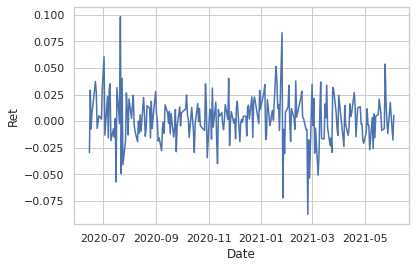

In [157]:
sns.set_theme(style="whitegrid")

dfc = df.copy()
dfc = dfc.set_index("Date")
sns.lineplot(data=dfc, x="Date", y="Ret")
# sns.lineplot(data=df[["Ret", "Alpha3"]] )

<AxesSubplot:xlabel='Date'>

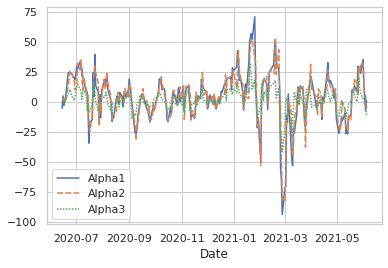

In [158]:
sns.lineplot(data=dfc[ ["Alpha1", "Alpha2", "Alpha3"] ])